In [38]:
import copy

import polars as pl
import polars.selectors as cs

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

from modules.utils import data_utils
from modules.types.constants_sedds import FeatureCategory

# Exploratory analysis of Size

- The following exploratory analysis of size is performed with the goal of learning about the potential absorption of the resulting SEDDS formulation.

- Based on the data it seems tha most important features are content of drug and other excipients as well as the sedds formulation has bigger chance to progress into further study if particle size of SEDDS is smaller.

- Note: Previous template of PDI analysis is used.

In [25]:
sedds_features = copy.copy(FeatureCategory.SEDDS.value)
sedds_features

['size', 'PDI', 'cplx_minmax_norm', 'progressed']

In [26]:
target = 'size'
progressed = 'progressed'

In [27]:
sedds_features.remove(target)
unvailable_input = sedds_features

In [28]:
data = data_utils.load_data()

In [19]:
data

progressed,size,PDI,API_prop,oil_total,surfactant_total,cosolvent_total,other_total,o_num,s_num,c_num,other_num,cplx_minmax_norm,API_mol_wt,logp_chemaxon,API_melt_temp,API_water_sol,API_polar_sa,API_rot_bond,API_H_bond_donor,API_H_bond_accept,o_LC,o_sat,s_HLB,c_mol_wt,c_melt_temp,c_boil_temp,c_density,c_viscosity
cat,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,cat,cat,f32,f32,f32,f32,f32,f32
"""0""",194.699997,0.231,19.049999,42.860001,38.099998,0.0,0.0,1.0,2.0,0.0,0.0,0.125,314.470001,6.33,67.0,0.0126,40.459999,6.0,2.0,2.0,"""0""","""1""",11.5,0.0,0.0,0.0,0.0,0.0
"""0""",194.0,0.268,18.18,45.450001,36.360001,0.0,0.0,1.0,2.0,0.0,0.0,0.125,314.470001,6.33,67.0,0.0126,40.459999,6.0,2.0,2.0,"""0""","""1""",11.5,0.0,0.0,0.0,0.0,0.0
"""0""",171.100006,0.232,17.389999,47.830002,34.779999,0.0,0.0,1.0,2.0,0.0,0.0,0.125,314.470001,6.33,67.0,0.0126,40.459999,6.0,2.0,2.0,"""0""","""1""",11.5,0.0,0.0,0.0,0.0,0.0
"""0""",182.699997,0.204,18.18,40.91,40.91,0.0,0.0,1.0,2.0,0.0,0.0,0.125,314.470001,6.33,67.0,0.0126,40.459999,6.0,2.0,2.0,"""0""","""1""",11.5,0.0,0.0,0.0,0.0,0.0
"""1""",201.800003,0.277,17.389999,43.48,39.130001,0.0,0.0,1.0,2.0,0.0,0.0,0.125,314.470001,6.33,67.0,0.0126,40.459999,6.0,2.0,2.0,"""0""","""1""",11.5,0.0,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""0""",166.0,0.33,0.116,31.459999,31.459999,6.99,29.969999,1.0,1.0,1.0,1.0,0.25,924.078979,-2.3,170.0,0.0819,319.609985,3.0,12.0,17.0,"""0""","""1""",15.0,76.099998,-59.0,188.199997,1.0,56.0
"""0""",118.0,0.36,0.104,31.469999,31.469999,6.99,29.969999,1.0,1.0,1.0,1.0,0.25,924.078979,-2.3,170.0,0.0819,319.609985,3.0,12.0,17.0,"""0""","""1""",15.0,76.099998,-59.0,188.199997,1.0,56.0
"""1""",150.0,0.27,0.169,31.450001,31.450001,6.99,29.950001,1.0,1.0,1.0,1.0,0.25,924.078979,-2.3,170.0,0.0819,319.609985,3.0,12.0,17.0,"""0""","""1""",15.0,76.099998,-59.0,188.199997,1.0,56.0


In [20]:
data_size_progressed = ( data
    .drop('PDI') # removing PDI because of large count of null values           
    .select([target, progressed])
    .drop_nulls()
)
data_size_progressed.describe()


statistic,size,progressed
str,f64,str
"""count""",506.0,"""506"""
"""null_count""",0.0,"""0"""
"""mean""",140.205658,null
"""std""",304.983734,null
"""min""",7.2,null
"""25%""",31.9,null
"""50%""",76.529999,null
"""75%""",170.699997,null
"""max""",4964.0,null


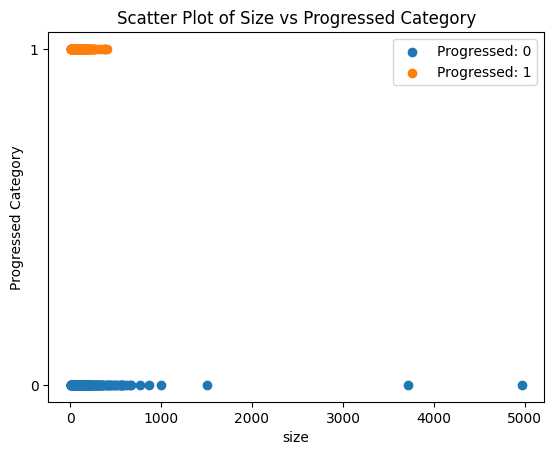

In [40]:
fig, ax = plt.subplots()
unique_categories = data_size_progressed[progressed].unique().to_list()
list(map(lambda category: ax.scatter(
    data_size_progressed.filter(pl.col(progressed) == category)[target].to_numpy(), 
    [category] * len(data_size_progressed.filter(pl.col(progressed) == category)), 
    label=f'Progressed: {category}'
), unique_categories))
ax.set_xlabel('size')
ax.set_ylabel('Progressed Category')
ax.set_title('Scatter Plot of Size vs Progressed Category')
ax.legend()
plt.show()

<Axes: ylabel='Count'>

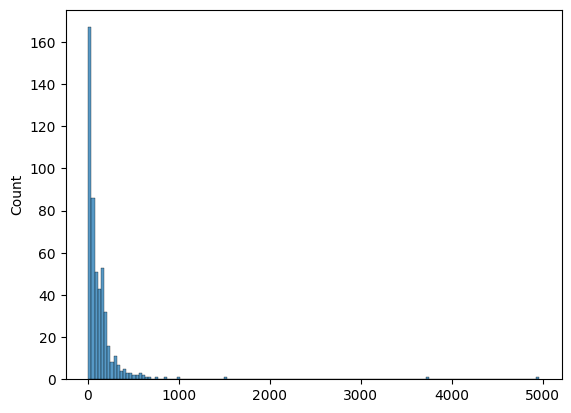

In [22]:
sns.histplot(data['size']) 

- Few outliers, such SEDDS formulations did not progress.


In [29]:
data = (data
 .drop(unvailable_input)
 .drop_nulls()
)

In [30]:
data.describe()

statistic,size,API_prop,oil_total,surfactant_total,cosolvent_total,other_total,o_num,s_num,c_num,other_num,API_mol_wt,logp_chemaxon,API_melt_temp,API_water_sol,API_polar_sa,API_rot_bond,API_H_bond_donor,API_H_bond_accept,o_LC,o_sat,s_HLB,c_mol_wt,c_melt_temp,c_boil_temp,c_density,c_viscosity
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64
"""count""",506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,"""506""","""506""",506.0,506.0,506.0,506.0,506.0,506.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",140.205658,6.377806,31.818943,46.476818,13.900208,1.427016,1.304348,1.332016,0.6917,0.100791,491.016418,4.568281,130.8004,0.044595,103.025551,8.640316,1.964427,4.891304,null,null,13.720553,87.813438,-44.76265,109.289925,0.630435,15.716996
"""std""",304.983734,6.334651,19.091309,20.201708,16.186337,7.187721,0.505672,0.657359,0.541185,0.320457,227.214096,1.73998,47.916725,0.147836,74.261086,3.573427,2.102031,3.25881,null,null,2.332197,107.795876,46.003979,93.347572,0.465803,28.835617
"""min""",7.2,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.289993,-2.3,59.5,0.00011,6.48,0.0,0.0,2.0,null,null,0.0,0.0,-114.099998,0.0,0.0,0.0
"""25%""",31.9,2.0,14.78,31.450001,0.0,0.0,1.0,1.0,0.0,0.0,360.829987,3.54,80.5,0.00071,52.599998,7.0,1.0,3.0,null,null,13.0,0.0,-76.0,0.0,0.0,0.0
"""50%""",76.529999,5.0,29.309999,45.0,9.5,0.0,1.0,1.0,1.0,0.0,418.559998,4.69,121.0,0.0122,112.07,7.0,1.0,3.0,null,null,14.5,46.099998,-50.0,78.400002,0.8,1.1
"""75%""",170.699997,8.5,48.5,62.0,24.360001,0.0,2.0,2.0,1.0,0.0,500.423004,5.28,149.5,0.0234,120.0,11.0,3.0,6.0,null,null,15.0,134.199997,0.0,202.0,1.0,4.8
"""max""",4964.0,52.700001,80.0,97.0,76.800003,68.040001,3.0,5.0,3.0,2.0,1202.609985,8.06,232.0,0.75,319.609985,18.0,12.0,17.0,null,null,16.9,600.0,32.5,261.200012,1.1,90.0


In [31]:
linear_models = {
    'linreg': Pipeline([
        ('fillna', SimpleImputer(strategy="median")),
        ('sc', MinMaxScaler()), 
        ('linreg', LinearRegression())
    ]),
    'rf': Pipeline([
        ('fillna', SimpleImputer(strategy="median")),
        ('sc', StandardScaler()), 
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
}

In [32]:
data.describe()

statistic,size,API_prop,oil_total,surfactant_total,cosolvent_total,other_total,o_num,s_num,c_num,other_num,API_mol_wt,logp_chemaxon,API_melt_temp,API_water_sol,API_polar_sa,API_rot_bond,API_H_bond_donor,API_H_bond_accept,o_LC,o_sat,s_HLB,c_mol_wt,c_melt_temp,c_boil_temp,c_density,c_viscosity
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64
"""count""",506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,"""506""","""506""",506.0,506.0,506.0,506.0,506.0,506.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",140.205658,6.377806,31.818943,46.476818,13.900208,1.427016,1.304348,1.332016,0.6917,0.100791,491.016418,4.568281,130.8004,0.044595,103.025551,8.640316,1.964427,4.891304,null,null,13.720553,87.813438,-44.76265,109.289925,0.630435,15.716996
"""std""",304.983734,6.334651,19.091309,20.201708,16.186337,7.187721,0.505672,0.657359,0.541185,0.320457,227.214096,1.73998,47.916725,0.147836,74.261086,3.573427,2.102031,3.25881,null,null,2.332197,107.795876,46.003979,93.347572,0.465803,28.835617
"""min""",7.2,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.289993,-2.3,59.5,0.00011,6.48,0.0,0.0,2.0,null,null,0.0,0.0,-114.099998,0.0,0.0,0.0
"""25%""",31.9,2.0,14.78,31.450001,0.0,0.0,1.0,1.0,0.0,0.0,360.829987,3.54,80.5,0.00071,52.599998,7.0,1.0,3.0,null,null,13.0,0.0,-76.0,0.0,0.0,0.0
"""50%""",76.529999,5.0,29.309999,45.0,9.5,0.0,1.0,1.0,1.0,0.0,418.559998,4.69,121.0,0.0122,112.07,7.0,1.0,3.0,null,null,14.5,46.099998,-50.0,78.400002,0.8,1.1
"""75%""",170.699997,8.5,48.5,62.0,24.360001,0.0,2.0,2.0,1.0,0.0,500.423004,5.28,149.5,0.0234,120.0,11.0,3.0,6.0,null,null,15.0,134.199997,0.0,202.0,1.0,4.8
"""max""",4964.0,52.700001,80.0,97.0,76.800003,68.040001,3.0,5.0,3.0,2.0,1202.609985,8.06,232.0,0.75,319.609985,18.0,12.0,17.0,null,null,16.9,600.0,32.5,261.200012,1.1,90.0


In [33]:
from sklearn.model_selection import train_test_split

X = data.drop([target] + unvailable_input).to_dummies(cs.categorical()).to_pandas()
y = data[target].to_pandas()

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
rf_model = linear_models.get('rf')
rf_model.fit(X_tr, y_tr).score(X_ts, y_ts)


0.04821122618152862

In [35]:
lin_reg = linear_models.get('linreg')
lin_reg.fit(X_tr, y_tr).score(X_ts, y_ts)

-0.05959438307313736

We will scale data in a range that models can learn.

In [36]:
t_lin_reg = TransformedTargetRegressor(
    regressor=LinearRegression(), 
    func=np.log, 
    inverse_func=np.exp
)

In [37]:
t_lin_reg.fit(X_tr, y_tr).score(X_ts, y_ts)

/Users/potato/Library/Caches/pypoetry/virtualenvs/sedds-analysis-sVmcoPsY-py3.12/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:217: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


-0.022194969316386315